Importing python libraries/modules

In [1]:
# Basic libraries for data manipulation
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning tasks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

Importing the data

In [7]:
# Load the dataset
data = pd.read_csv('diabetes.csv')  # Make sure the filename matches exactly

Display the data

In [8]:
# Display the first few rows of the dataset
print(data.head())

# Get basic information about the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

Creation of independent and dependent variables

In [9]:
# Define the independent variables (X) and dependent variable (y)
X = data.drop('Outcome', axis=1)  # 'Outcome' is the target variable
y = data['Outcome']

Replacing missing values

In [10]:
# Replace 0s with the column mean for specific columns
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_with_zeros:
    X[col] = X[col].replace(0, X[col].mean())

# Verify if 0s are replaced
print(X[cols_with_zeros].isnull().sum())

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


Splitting into training and testing set

In [12]:
from sklearn.model_selection import train_test_split

# Define independent (X) and dependent (y) variables
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check if it worked
print(X_train.shape, X_test.shape)

(614, 8) (154, 8)


Feature scaling

In [13]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()

# Fit and transform the training data, transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the scaled data
print(X_train_scaled[:5])  # Display first 5 rows of scaled training data

[[-0.52639686 -1.15139792 -3.75268255 -1.32277365 -0.70120553 -4.13525578
  -0.49073479 -1.03594038]
 [ 1.58804586 -0.27664283  0.68034485  0.23350519 -0.70120553 -0.48916881
   2.41502991  1.48710085]
 [-0.82846011  0.56687102 -1.2658623  -0.09071957  0.01344832 -0.42452187
   0.54916055 -0.94893896]
 [-1.13052335  1.2541786  -1.04961706 -1.32277365 -0.70120553 -1.30372015
  -0.63929127  2.79212217]
 [ 0.68185612  0.41066475  0.57222224  1.07648956  2.48460077  1.83812075
  -0.68682934  1.13909516]]


Graphs/plots

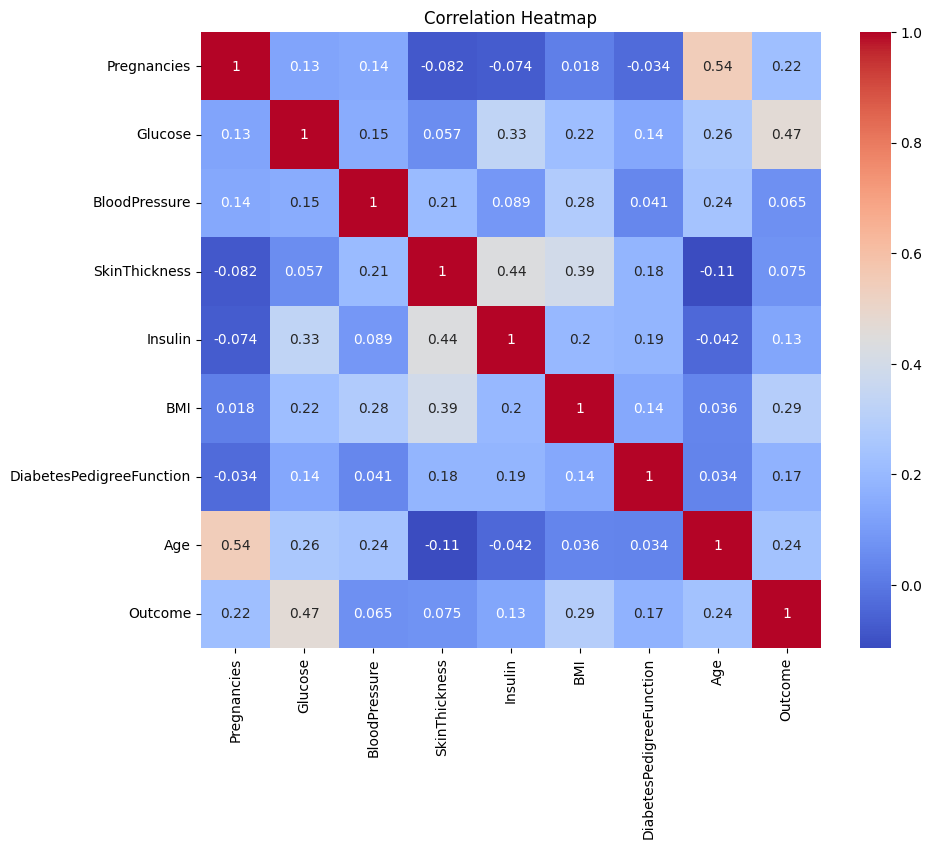

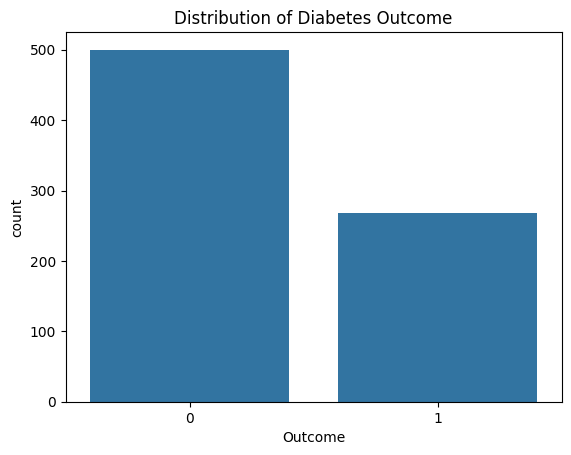

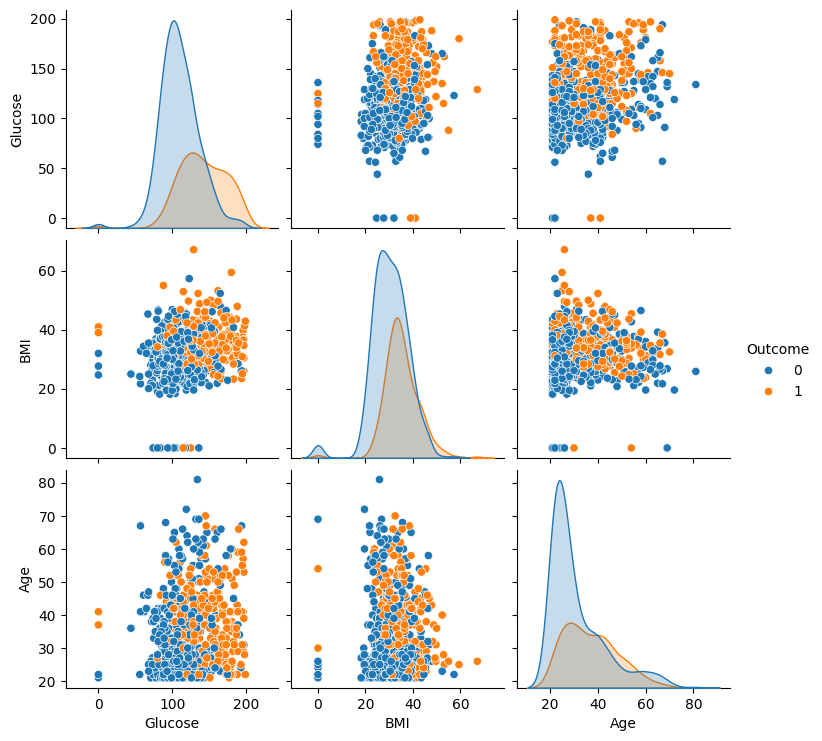

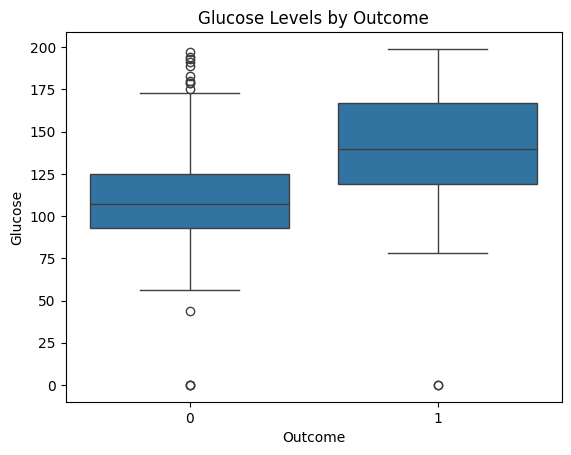

In [14]:
# Plot 1: Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Plot 2: Distribution of Outcome (Diabetes or Not)
sns.countplot(x='Outcome', data=data)
plt.title('Distribution of Diabetes Outcome')
plt.show()

# Plot 3: Pairplot of key features
sns.pairplot(data[['Glucose', 'BMI', 'Age', 'Outcome']], hue='Outcome')
plt.show()

# Plot 4: Boxplot to detect outliers in Glucose
sns.boxplot(x='Outcome', y='Glucose', data=data)
plt.title('Glucose Levels by Outcome')
plt.show()